# EE5175 Lab 4 : Space Invariant Blurring
Author: Kishore Rajendran [EE20B064]

Date: 2 March 2024

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Function to convolve an image and kernel to give an output image of the same size as the input image (By choosing pad_size accordingly)

In [2]:
# Define 2D convolution operation
def convolve2d(img, kernel):
    # Flipping the kernel
    flipped_kernel = np.flip(kernel)
    # Pad the image
    kernel_size = kernel.shape[0]
    pad_size = int((kernel_size - 1)/2)
    pad_img = np.pad(img, ((pad_size,pad_size), (pad_size,pad_size)), mode='constant', constant_values=(0,0))
    # Convolving the padded image and the kernel
    conv_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = pad_img[i:i+kernel_size, j:j+kernel_size]
            conv_img[i, j] = np.sum(window*flipped_kernel)
    return conv_img

Generating values from the joint 2D gaussian distribution

In [3]:
# A function to generate the values from a 2D gaussian distribution
def gaussian_2d_values(m, n, stdev):
    return (1/(2*np.pi*stdev**2))*np.exp(-(np.square(m) + np.square(n))/(2*stdev**2))

Space Invariant Gaussian Blurring with Kernel size = $(6\sigma+1)$ x $(6\sigma+1)$

In [4]:
# A function to construct the gaussian blur kernel
def gaussian_blur_kernel(stdev):
    kernel_size = np.ceil(6*stdev+1)
    # Make the kernel size odd valued
    if kernel_size%2 == 0: kernel_size+=1
    # Generating meshgrid s.t center is (0,0)
    offset = (kernel_size - 1)/2
    x = y = np.arange(kernel_size) - offset
    xx, yy = np.meshgrid(x, y)
    # Generate the kernel according to the gaussian distribution values
    kernel = gaussian_2d_values(xx, yy, stdev)
    # Normalizing so that the all values of the kernel sum up to one
    kernel /= np.sum(kernel)
    return kernel

Using the defined functions to generate a gaussian blur kernel and convolve it with the image

In [5]:
def apply_gaussian_blur(img, stdev):
    # Handling the special case of stdev = 0
    if stdev == 0:
        return img
    # Generating the Gaussian blur kernel
    kernel = gaussian_blur_kernel(stdev)
    # Convolving the image with the blur kernel
    blur_img = convolve2d(img, kernel)
    return blur_img

Calling the above defined gaussian blur function for given image and various values of standard deviation

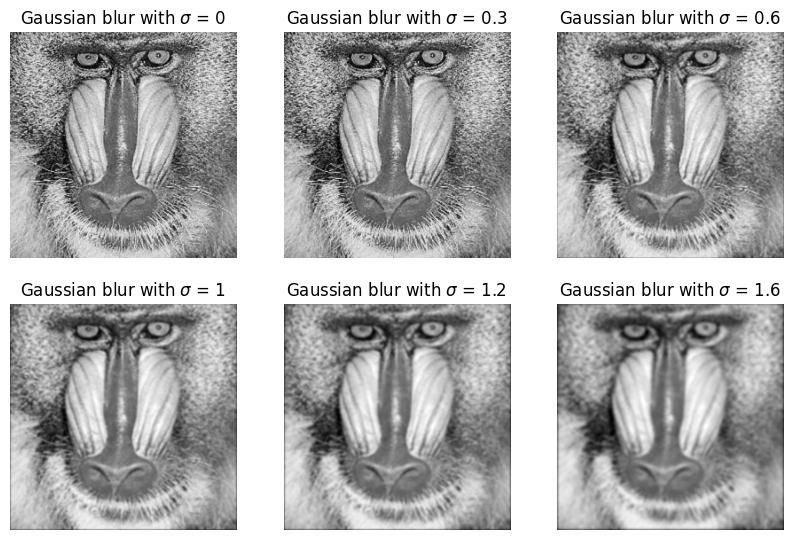

In [6]:
# Importing the image as numpy array
img = np.array(Image.open("Mandrill.png"))

# Array containing all the values of standard deviations
stdev_values = [0, 0.3, 0.6, 1, 1.2, 1.6]

# Blurring the image and plotting it for all the above values of standard deviation
idx = 0
plt.figure(figsize=(10, 10))
for stdev in stdev_values:
    blur_img = apply_gaussian_blur(img, stdev)
    idx+=1
    plt.subplot(3, 3, idx)
    plt.imshow(blur_img, cmap='gray')
    plt.title("Gaussian blur with $\sigma$ = "+ str(stdev))
    plt.axis('off')

plt.show()

# Observations
1. In the function $\texttt{convolve2d}$, the kernel is being flipped according to the general convolution process. However in our case, this can be ignored, since the Gaussian blur kernel is symmetric and it remains the same even after flipping.
2. Clearly, as the value of standard deviation increases, the resulting image is more blurred.
3. This is because with higher $\sigma$, the kernel size also increases, which is equivalent to a larger blur radius, ie: More blurring
4. All parts of one resulting image look equally blurred, since the blur is spacially invariant.